# Preprocessing and EDA

In [42]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re
from sklearn.feature_extraction.text import TfidfVectorizer

## 1. Creating Features

In [43]:
data = pd.read_csv('PWdata.csv', on_bad_lines='skip')

# Inital cleaning
data = data.dropna().reset_index(drop=True)  # removed 1 row
data.password = data.password.astype(str)

print('nrows: {}'.format(data.size))
data.head(4)

nrows: 1339278


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1


In [44]:
# Create basic features from password string
data['length'] = data.password.str.len()  # length of password
data['ratio_lower'] = data.password.apply(lambda pw: len(re.findall(r'[a-z]', pw))) / data.length  # ratio of lowercase letters
data['ratio_upper'] = data.password.apply(lambda pw: len(re.findall(r'[A-Z]', pw))) / data.length  # ratio of uppercase letters
data['ratio_numbers'] = data.password.apply(lambda pw: len(re.findall(r'[0-9]', pw)))  / data.length  # ratio of numeric characters
data['ratio_special'] = data.password.apply(lambda pw: len(re.findall(r'[!@#$%^&*()_+{}\[\]:"\\<>?|;,.\'´`/]', pw))) / data.length  # ratio of special characters
data['ratio_unique'] = data.password.apply(lambda pw: len(set(pw))) / data.length  # ratio of unique characters
data['nr_types'] = data[['ratio_lower', 'ratio_upper', 'ratio_numbers', 'ratio_special']].apply(lambda row: sum(row > 0), axis=1)  # number of different types of characters

# save data as csv
data.to_csv('PWdata_cleaned.csv', index=False)
data

,password,strength,length,ratio_lower,ratio_upper,ratio_numbers,ratio_special,ratio_unique,nr_types
0,kzde5577,1,8,0.500000,0.0,0.500000,0.0,0.750000,2
1,kino3434,1,8,0.500000,0.0,0.500000,0.0,0.750000,2
2,visi7k1yr,1,9,0.777778,0.0,0.222222,0.0,0.888889,2
3,megzy123,1,8,0.625000,0.0,0.375000,0.0,1.000000,2
4,lamborghin1,1,11,0.909091,0.0,0.090909,0.0,1.000000,2
...,...,...,...,...,...,...,...,...,...
669634,10redtux10,1,10,0.600000,0.0,0.400000,0.0,0.800000,2
669635,infrared1,1,9,0.888889,0.0,0.111111,0.0,0.888889,2
669636,184520socram,1,12,0.500000,0.0,0.500000,0.0,1.000000,2
669637,marken22a,1,9,0.777778,0.0,0.222222,0.0,0.777778,2


In [45]:
# # Calculate tfidf score of letters
# vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 1), lowercase=False) 
# vectorizer.fit(data.password)
# tfidf_matrix = vectorizer.transform(data.password).toarray()

# tfidf_df = pd.DataFrame(data=tfidf_matrix, columns=vectorizer.get_feature_names_out())
# data_tfidf = pd.concat([data, tfidf_df], axis=1)

# # Check sizes 
# print('tfidf_matrix.shape: {}'.format(tfidf_matrix.shape))
# print('data.shape: {}'.format(data.shape))
# print('tfidf_df.shape: {}'.format(tfidf_df.shape))
# print('data_tfidf.shape: {}'.format(data_tfidf.shape))

# # Print tfidf features
# print('{} features:\n{}'.format(len(vectorizer.get_feature_names_out()), vectorizer.get_feature_names_out()))
# data_tfidf.head()

## Summary statistics and plots

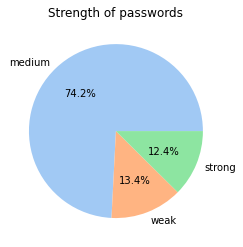

In [46]:
# plot piechart of strength of password
pie_data = data.strength.map({0:'weak',1:'medium',2:'strong'}).value_counts()
colors = sns.color_palette('pastel')[0:5]

fig= plt.figure(figsize=(5, 4)).set_facecolor('white')
plt.pie(pie_data, labels=pie_data.index, colors=colors, autopct='%1.1f%%')
plt.title('Strength of passwords')
plt.show() # plt.savefig('piechart.png')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669639 entries, 0 to 669638
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   password       669639 non-null  object 
 1   strength       669639 non-null  int64  
 2   length         669639 non-null  int64  
 3   ratio_lower    669639 non-null  float64
 4   ratio_upper    669639 non-null  float64
 5   ratio_numbers  669639 non-null  float64
 6   ratio_special  669639 non-null  float64
 7   ratio_unique   669639 non-null  float64
 8   nr_types       669639 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 46.0+ MB


In [64]:
data.head()

,password,strength,length,ratio_lower,ratio_upper,ratio_numbers,ratio_special,ratio_unique,nr_types
0,kzde5577,1,8,0.500000,0.0,0.500000,0.0,0.750000,2
1,kino3434,1,8,0.500000,0.0,0.500000,0.0,0.750000,2
2,visi7k1yr,1,9,0.777778,0.0,0.222222,0.0,0.888889,2
3,megzy123,1,8,0.625000,0.0,0.375000,0.0,1.000000,2
4,lamborghin1,1,11,0.909091,0.0,0.090909,0.0,1.000000,2


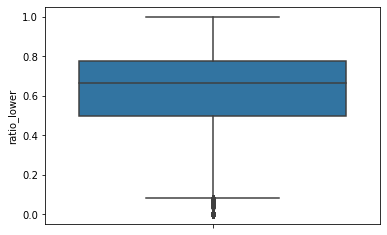

In [79]:
# data_box = pd.melt(data, id_vars='strength', value_vars=['length', 'ratio_lower', 'ratio_upper', 'ratio_numbers', 'ratio_special', 'ratio_unique', 'nr_types'])
box_data = data.iloc[:, 1:]
box_data.strength = box_data.strength.map({0:'weak',1:'medium',2:'strong'})
box_data

sns.boxplot(y='ratio_lower', hue='strength', data=box_data)
plt.show()

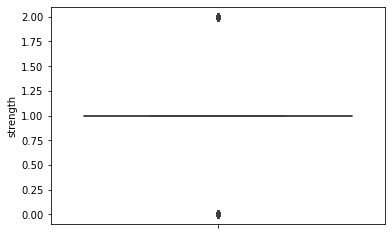

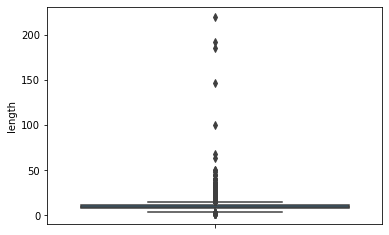

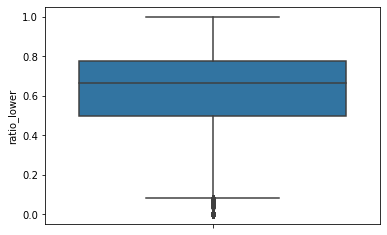

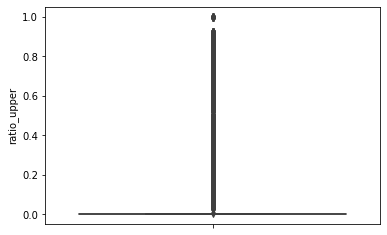

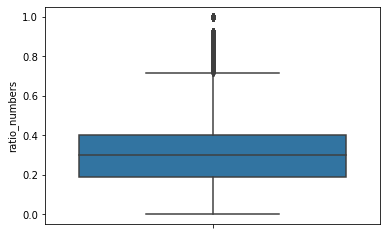

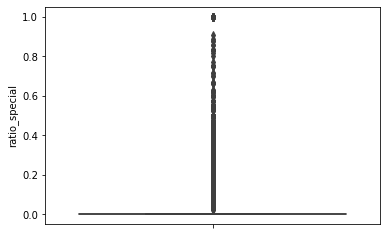

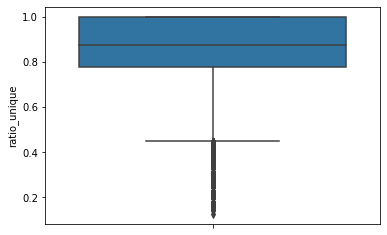

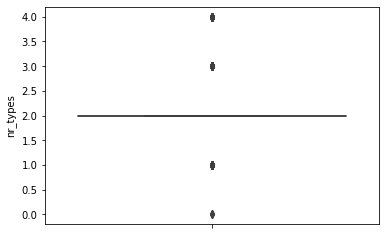

In [52]:
# plot boxplot for every variable om data
for col in data.columns[1:]:
    sns.boxplot(data=data, y=col, hue='strength')
    plt.show()
